In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os.path
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from cavityclass import *

LAM = 1064*10**(-7) 
M2_x = 1.453
M2_y = 1.678

In [3]:
ds18 = Cavity('testfile.dat', LAM)
print(ds18.cavity)
xcav = Cavity(ds18.get_xcav().cavity, LAM*M2_x)
ycav = Cavity(ds18.get_ycav().cavity, LAM*M2_y)

[['M', 100.0], ['D', 20.0], ['M', -70.0, 12.5], ['D', 2.0], ['L', 19.0], ['D', 2.0], ['M', -100.0, 12.5], ['D', 19.5], ['B', 1.5], ['D', 5.0], ['M', 0.0]]


X-Axis:
   Divergence (mrad)  Rayleigh Range(cm)  Spot Size(um)
M      -7.321339e+00           48.661244    7321.339156
D      -4.194128e+00           48.661244    6142.409568
M       1.378171e+01           21.742096    6142.409568
D       1.415232e+01           21.742096    6421.832307
L      -1.964680e+01           13.622102    6421.832307
D      -1.926593e+01           13.622102    6032.585984
M      -6.907822e+00           38.974813    6032.585984
D      -1.504663e+00           38.974813    5171.901387
B      -1.423902e+00           43.521336    5465.241083
D       7.637989e-16           43.521336    5429.526831
M       7.637989e-16           43.521336    5429.526831
Y-Axis:
   Divergence (mrad)  Rayleigh Range(cm)  Spot Size(um)
M      -1.249890e+00           48.336365    1249.890420
D      -6.872645e-01           48.336365    1051.320058
M       2.245306e+00           23.146575    1051.320058
D       2.311853e+00           23.146575    1096.905772
L      -3.461335e+00           1

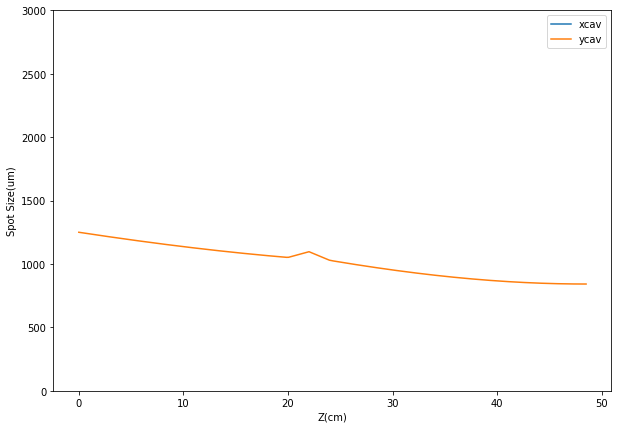

In [4]:
%run plotcav.py

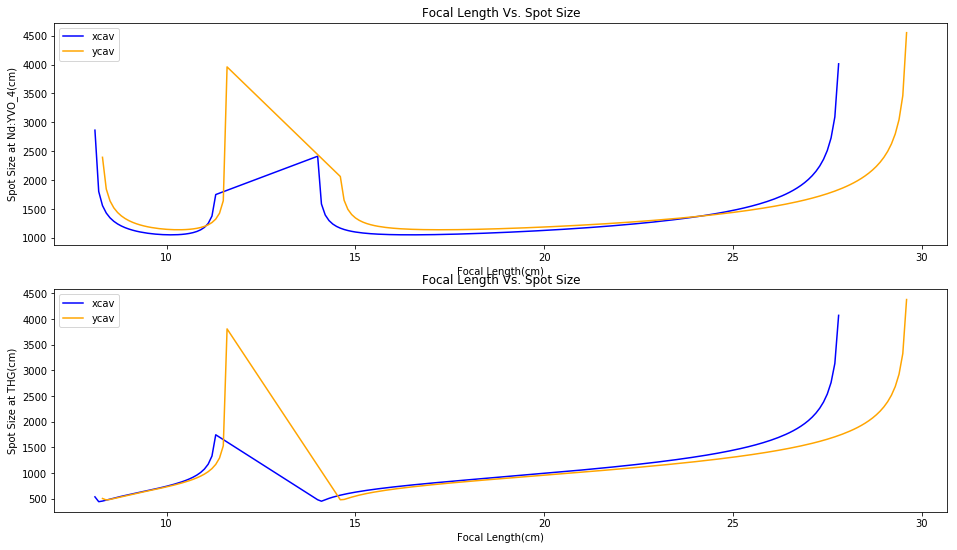

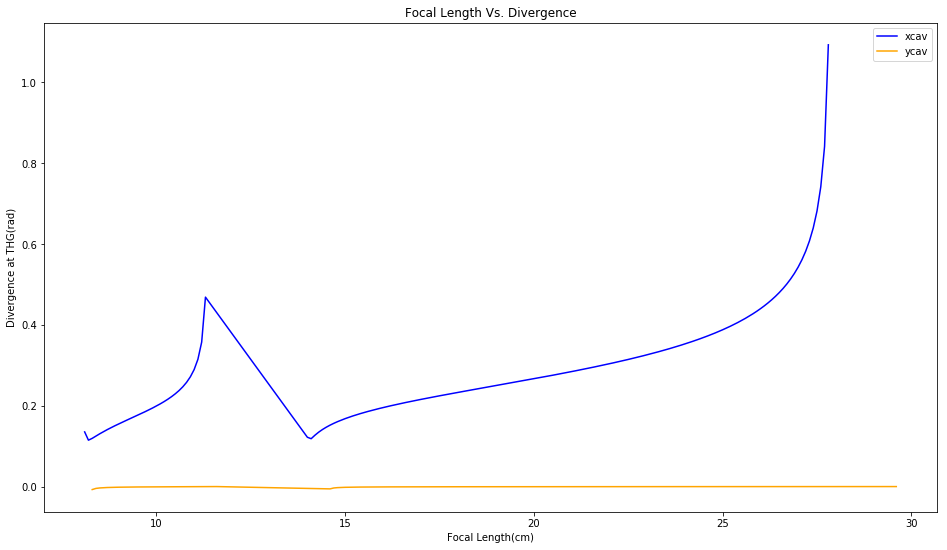

In [6]:
Wx_at_THG = []
Wx_at_V = []
Wy_at_THG = []
Wy_at_V = []
Dx_at_THG = []
Dy_at_THG = []
Fx = []
Fy = []
for i in np.arange(5,30,.1):
    new_xcav = xcav.remove_optic(5).insert_optic('L',i,5)
    new_ycav = ycav.remove_optic(5).insert_optic('L',i,5)
    if new_xcav.is_stable:
        Wx_at_V.append(new_xcav.waist(22))
        Wx_at_THG.append(new_xcav.waist(new_xcav.L - 4.99))
        Dx_at_THG.append(new_xcav.div(new_xcav.L - 4.99))
        Fx.append(i)
        
    if new_ycav.is_stable:
        Wy_at_V.append(new_ycav.waist(22))
        Wy_at_THG.append(new_ycav.waist(new_ycav.L - 4.99))
        Dy_at_THG.append(new_ycav.div(new_ycav.L - 4.99))
        Fy.append(i)                   

fig2 = plt.figure(figsize=(16,9))
ax21 = fig2.add_subplot(2,1,1)
ax21.plot(Fx, Wx_at_V, 'b', label='xcav')
ax21.plot(Fy, Wy_at_V, 'orange', label='ycav')
ax21.set_title('Focal Length Vs. Spot Size')
ax21.set_xlabel('Focal Length(cm)')
ax21.set_ylabel('Spot Size at Nd:YVO_4(cm)')
ax21.legend()

ax22 = fig2.add_subplot(2,1,2)
ax22.plot(Fx, Wx_at_THG, 'b', label='xcav')
ax22.plot(Fy, Wy_at_THG, 'orange', label='ycav')
ax22.set_title('Focal Length Vs. Spot Size')
ax22.set_xlabel('Focal Length(cm)')
ax22.set_ylabel('Spot Size at THG(cm)')
ax22.legend()

fig3 = plt.figure(figsize=(16,9))
ax3 = fig3.add_subplot(1,1,1)
ax3.plot(Fx, Dx_at_THG, 'b', label='xcav')
ax3.plot(Fy, Dy_at_THG, 'orange', label='ycav')
ax3.set_title('Focal Length Vs. Divergence')
ax3.set_xlabel('Focal Length(cm)')
ax3.set_ylabel('Divergence at THG(rad)')
ax3.legend()

#d1 = {'Focal Length X (cm)': Fx, 'Focal Length Y (cm)': Fy, 'Spot Size X at Nd:YVO_4 (um)': Wx_at_V, 'Spot Size Y at Nd:YVO_4 (um)': Wy_at_V}
#d2 = {'Focal Length X (cm)': Fx, 'Focal Length Y (cm)': Fy, 'Spot Size X at THG (um)': Wx_at_THG, 'Spot Size Y at THG (um)': Wy_at_THG}

#df1 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d1.items() ]))
#df1.to_excel('Spotsize_ndyvo4_7,7A.xls', index = False)
#df2 = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in d2.items() ]))
#df2.to_excel('Spotsize_THG_7,7A.xls', index = False)
#plt.show()